# Iris Classifier: Decision Tree

## Overview
This notebook demonstrates a complete end-to-end workflow for building a Decision Tree classifier on the classic Iris dataset using Python and scikit-learn. 

It covers all the main steps of a typical machine learning project, including:

- Loading and exploring the Iris dataset
- Splitting the data into training and testing sets
- Training a Decision Tree model
- Evaluating model performance with accuracy, confusion matrix, and classification report
- Visualising results with plots such as the confusion matrix heatmap, feature scatter plots, pair plots, and feature distributions
- Examining feature importance to understand which measurements are most influential in classifying the Iris species

This notebook provides a clear, reproducible example of a full ML workflow suitable for learning or demonstration purposes.

## Step 1: Load and Prepare the Data
We load the Iris dataset, examine its features, and split it into training and test sets.


In [1]:
# Step 1: Load and Prepare the Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the dataset
iris = load_iris()
X = iris.data      # Features
y = iris.target    # Labels

# Show feature names and target names
print("Features:", iris.feature_names)
print("Target names:", iris.target_names)

# Check first 5 rows
print("First 5 feature rows:\n", X[:5])
print("First 5 labels:", y[:5])

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 feature rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]


# Step 2: Train a Decision Tree Classifier

We initialise a Decision Tree model and train it on the training data. 
The model will learn patterns to classify iris species based on flower measurements.

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 3: Make Predictions

We use the trained model to predict the species of the flowers in the test set.

In [3]:
# Make predictions
y_pred = model.predict(X_test)

# Compare a few predictions to actual labels
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


# Step 4: Evaluate the Model

We evaluate the model using accuracy, a confusion matrix, and a classification report. 
This helps us understand how well the model performs.

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Step 5: Feature Importance

We examine which features contribute most to the decision-making of the decision tree. 
Scikit-learn provides `feature_importances_` to quantify this. Understanding feature importance 
helps us see which measurements (like petal length or sepal width) influence the classification the most.

In [5]:
# Step 5a: Check Feature Importance
import pandas as pd

# Get the importance scores from the trained model
feature_importances = model.feature_importances_
features = iris.feature_names

# Create a DataFrame for readability and sort by importance
importance_table = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_table = importance_table.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_table)

             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


## Step 6: Decision Tree Visualisation

We visualise the trained decision tree to understand how the model makes decisions. 
Each node represents a feature split, and the leaf nodes show the predicted class.  
Colour-filled nodes help distinguish classes.

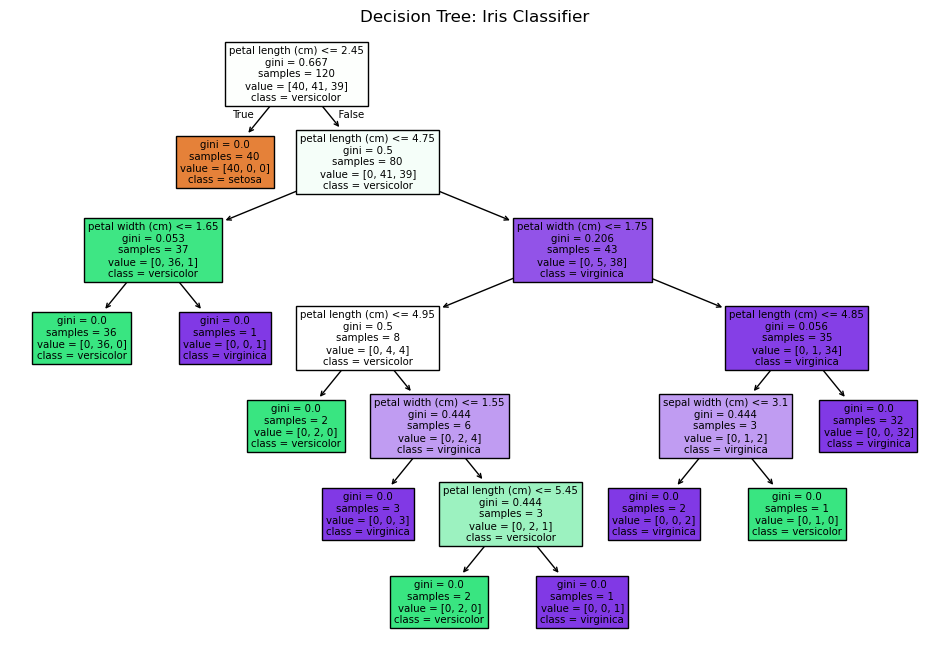

In [6]:
# Step 6a: Decision Tree Visualization
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(
    model, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    filled=True
)
plt.title("Decision Tree: Iris Classifier")
plt.show()

## Step 7: Iris Dataset Scatter Plot

Visualising the dataset itself can reveal patterns. Here we plot petal length vs petal width, 
color-coded by species. This helps us see how separable the species are in this 2D feature space.


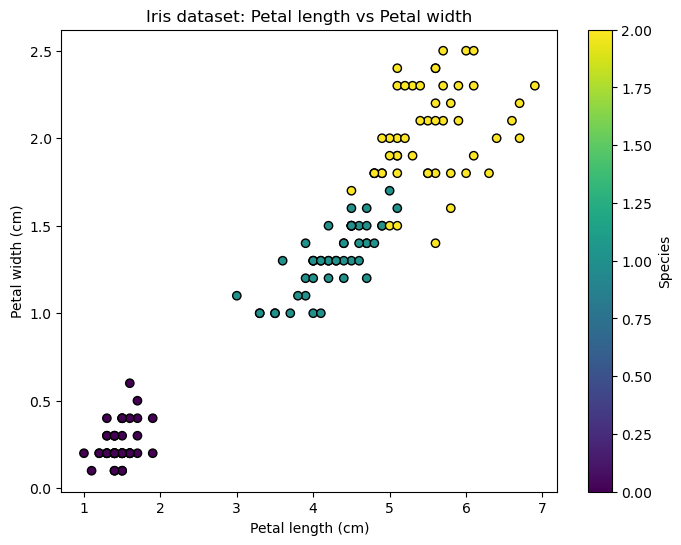

In [7]:
# Step 7a: Scatter plot of petal length vs petal width
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, cmap='viridis', edgecolor='k')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Iris dataset: Petal length vs Petal width")
plt.colorbar(label='Species')
plt.show()

## Step 8: Pair Plot for Feature Relationships
We use Seaborn's pairplot to visualise the relationships between all pairs of features.
This helps us see patterns, clusters, and potential separation between classes.

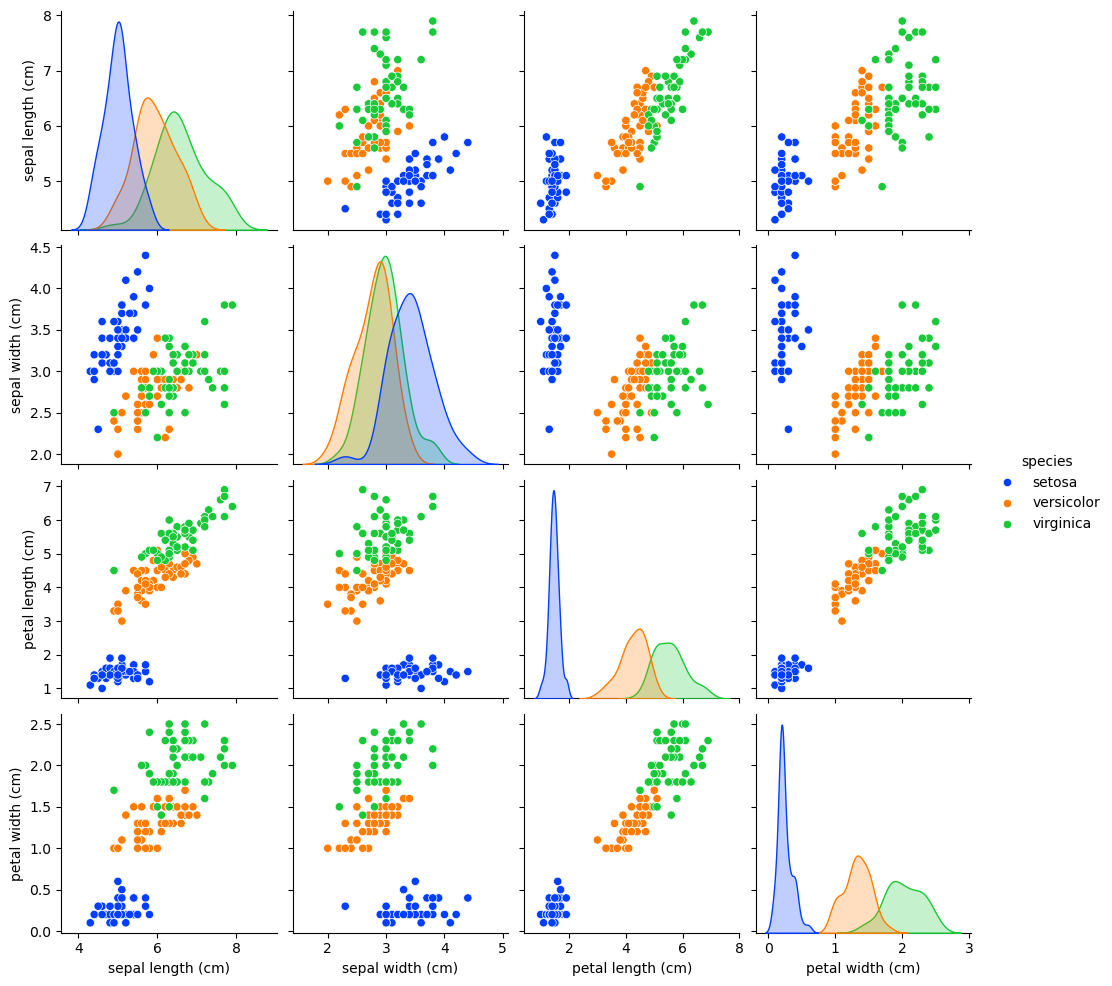

In [8]:
import seaborn as sns
import pandas as pd

# Convert data to DataFrame for easier plotting
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pairplot to see all pairwise relationships
sns.pairplot(iris_df, hue='species', palette='bright')
plt.show()

## Step 9: Feature Distributions
We visualise how each feature (sepal length, sepal width, petal length, petal width) is distributed for each Iris species.
This helps identify which features may be most informative for the classifier.

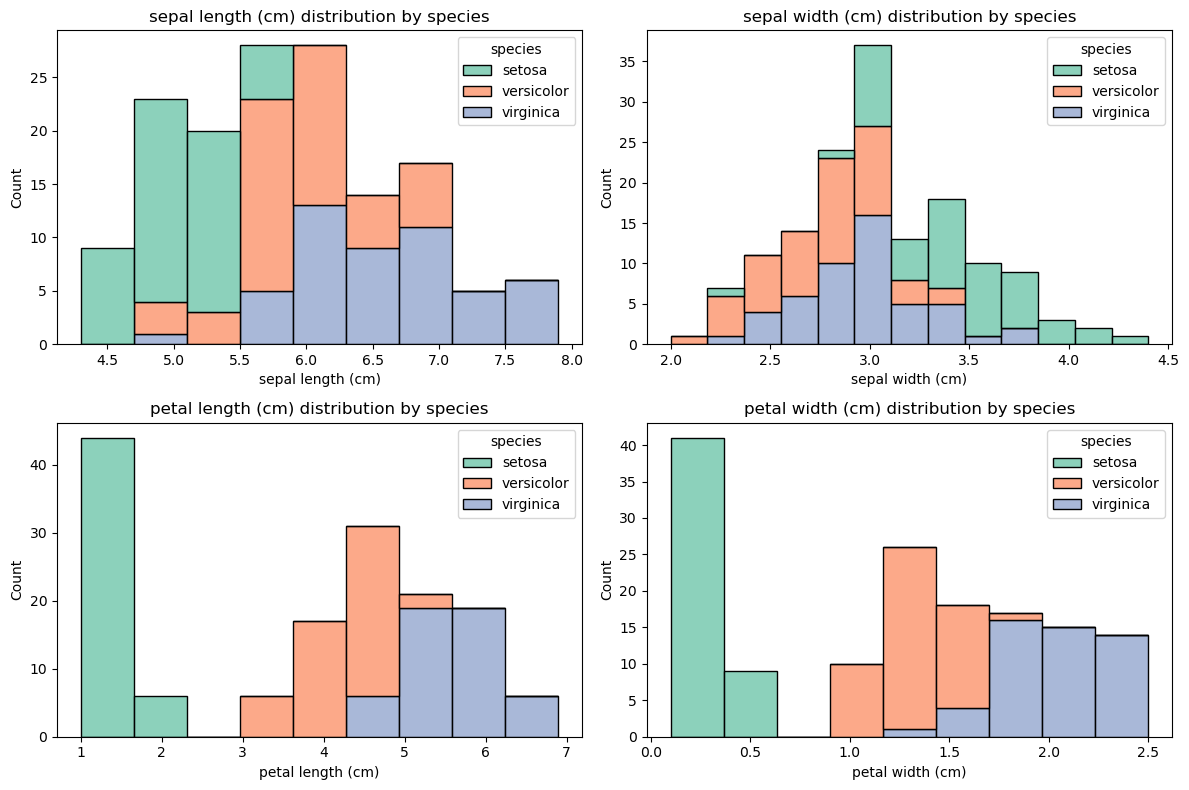

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame including species names
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plot histograms for each feature by species using Seaborn
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=feature, hue='species', multiple='stack', palette='Set2', edgecolor='black')
    plt.title(f"{feature} distribution by species")

plt.tight_layout()
plt.show()